# Chapter 1 - Exploratory Data Analysis(탐색적분석)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
os.chdir('C:\\Users\\my\\Desktop')

## Estimates of Location( 위치추정)

> 데이터가 주어졌을때 데이터를 살펴보는 가장 기초적인 단계는 각 피쳐의 대표값을 구하는 것 
이는 중심경향성을 나타내는 추정값 

In [2]:
# 미국 각 주의 인구와 살인비율 데이터 

state = pd.read_csv("data/state.csv") 
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


### 평균 - mean

In [3]:
state["Population"].mean()

6162876.3

### 절사평균 - trim_mean

> 값들을 크기 순으로 정렬한 후 , 양끝에서 일정 개수의 값들을 삭제한 뒤 남은 값들을 가지고 구한 평균   
> 극단값의 영향을 제거

> 절사평균을 구하기 위해서는 scipy.stats 필요  
>SciPy는 과학기술계산을 위한 Python 라이브러리이다. NumPy, Matplotlib, pandas, SymPy와 연계되어 있다

In [4]:
from scipy.stats import trim_mean

trim_mean(state["Population"],0.1) # 0.1 은 각 끝에서 10%를 제외한다는 의미 

4783697.125

### 가중평균  -weighted.mean
>각 데이터 값 x1에 사용자가 지정한 가중치 w1를 곱한 값들의 총합을 다시 가충치의 총합으로 나눈 것 

In [5]:
np.average(state["Murder.Rate"], weights = state["Population"])

4.445833981123393

### 중간값 - median
> 데이터를 일렬로 정렬했을때 한가운데 위치하는 값  
> 데이터에 민감한 평균보다 중간값이 위치추정에 더 유리

In [6]:
state["Population"].median()

4436369.5

### 가중중간값 - wquantiles
> 단순히 가운데 위치한 값이 아닌 어떤 위치를 기준으로 상위 절반의 가중치의 합이 하위절반의 가중치의 합과 동일한 위치의 값

>가중중간값을 사용하니위해 import weighted 필요

In [8]:
import wquantiles
wquantiles.median(state["Murder.Rate"], weights = state["Population"])

4.4

### 특이값 
* 어떤 데이터 집합에서 다른 값들과 매우 멀리 떨어져 있는 값

> 일반적으로 위치추정에서 평균을 사용 but  
> 특이값들의 영향을 받지 않는 중간값, 가중중간값이 로버스트한 위치추정 방법 

## Estimates of Variability(변이추정)

> 변이는 데이터 값이 얼마나 밀집해 있는 혹은 퍼져있는지를 나타내는 산포도를 나타낸다.

In [9]:
state.head(8)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


### 표준편차- std
> 분산의 제곱근 

In [10]:
state["Population"].std()

6848235.347401142

### IQR(사분위범위)  - quantile(0.75) - quantile(0.25)
>  25번째 백분위수와 75번째 백분위수의 차이 

In [11]:
state["Population"].quantile(0.75) - state["Population"].quantile(0.25)

4847308.0

### 중위절대편차- mad
>분산 ,표준편차 , 평균절대편차 모두 특잇값과 극단값에 로버스트하지 않다.   
> 중위절대편차는 로버스트   
> 계산하기 위해 statsmodels 패키지의 strong.scale.mad 함수 이용

In [12]:
from statsmodels import robust
robust.scale.mad(state["Population"])

3849876.1459979336

## Percentiles and Boxplots(백분위수와 상자그림)

판다스에서 데이터프래임 method `quantile`을 제공 

In [13]:
state["Murder.Rate"].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [14]:
np.round(state["Murder.Rate"].quantile([0.05,0.25,0.5,0.75,0.95]),1)

0.05    1.6
0.25    2.4
0.50    4.0
0.75    5.6
0.95    6.5
Name: Murder.Rate, dtype: float64

### boxplott(상자그림)
>백분위수를 이용해 데이터의 분산을 쉽게 시각화하는 방법

Text(0, 0.5, 'Population(millions)')

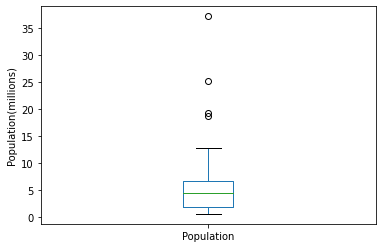

In [16]:
ax = (state["Population"]/1_000_000).plot.box()
ax.set_ylabel("Population(millions)")

초록선은 중간닶을 나타내기 때문에 주별 인구의 중간값이 약 500만 인구 거주  
파란 박스가 사분위수를 나타내기 때문에 주 절반이 약 200만에서 700만사이 인구 거주  
위아래로 나와있는 선이 수염(whisker)로 데이터 전체의 범위를 나타낸다.  

## Frequency Table and Histograms(도수분포표와 히스토그램)

### 도수분포표
> 변수의 범위를 동일한 크기의 구간으로 나눈 다음, 각 구간마다 몇 개의 변수의 값이 존재하는지를 보여준다.

#### pandas.cut() 함수는 각 구간에 매핑하는 시리즈를 만든다. 
#### value_counts() 메서드를 사용하여 빈도 테이블을 구한다.

In [17]:
binnePopulation = pd.cut(state["Population"],10) # state["Population"]을 열개의 동일한 구간으로 만든다.

In [18]:
binnePopulation.value_counts() #구간의 값을 구한다.

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

도수분포표와 백분위수 모두 구간을 나눠서 데이터를 살펴보는 접근 방법이다. 사분위수와 십분위수는 각 구간에 같은 수의 데이터가 포함되도록 즉 서로 크기가 다른 구간을 나누는 것이라면 도수분포표는 구간의 크기가 같도록 즉 구간안에 다른 개수의 데이터가 오도록 한다고 볼 수 있다.

### 히스토그램 
> 도수분포표를 시각화  
  x축에 구간들을 표시 ,y축에 해당 구간별 데이터의 개수를 표시

Text(0.5, 0, 'Population(Millions)')

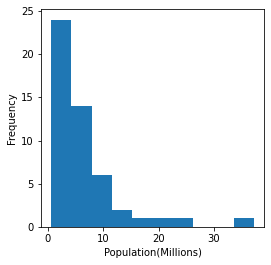

In [19]:
ax = (state["Population"]/1_000_000).plot.hist(figsize= (4,4))
ax.set_xlabel("Population(Millions)")

히스토그램으로 얻을 수 있는 정보들   
그래프에 빈 구간들이 있다.  
구간을 동일한 크기를 갖는다.  
구간의 수는 사용자가 결정할 수 있다.  
빈 구간이 있지 않은 이상 , 막대 사이는 공간 없이 서로 붙어있다.  

왜도 - 데이터가 큰 값이나 작은 값 쪽으로 얼마나 비스듬이 쏠려있는지를 나타낸다.  
첨도 - 데이터가 극 값을 갖는 경향성을 나타낸다.

## Density Estimates
> 데이터의 분포를 연속된 선으로 보여준다. 커널밀도추정을 통해 데이터로부터 직접 계산한다.  
  pandas는 밀도그림을 생성하기 위해 density메서드를 제공, 밀도의 부드러움을 제어하기 위해 bw_method 이용

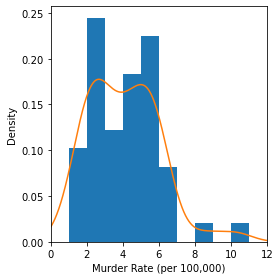

In [20]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))

state['Murder.Rate'].plot.density(ax=ax) # 동일한 그래프에 그래프가 추가될 수 있도록 선택적으로 축인수 준다.
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

## Exploring Binary and Categorical Data(이진 데이터와 범주데이터 탐색)

### Binarydata(이진 데이터)
>기본 단위가 2개의 상태만 가지는 데이터이다. 일반적으로 이진법과 불 대수에서는 2개의 상태를 0과 +1로 나타낸다.

In [21]:
dfw = pd.read_csv("data/dfw_airline.csv")
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [23]:
dfw.values.sum()

279126.05000000005

In [24]:
print(100 * dfw / dfw.values.sum()) # 댈러스 - 포트워스 공항의 운행지연 원인별 퍼센트 비율

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


### 막대도표 
> 범주형 자료를 보여줄 때 주로 사용된다.  
  x축 위에 각 범주들을 놓고 y축에 각 범주에 해당하는 횟수나 비율을 표시한다.

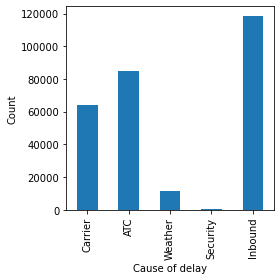

In [29]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### 최빈값 
> 데이터에서 가장 자주 등장하는 값 혹은 값들을 의미한다.  
 [1,2,3,1,2,1] 최빈값은 1

### 기대값
> 범주형 데이터 중에 각 범주에 해당하는 수치형 변수들이 존재하는 특별한 경우가 있을 수 있다.  
  가중치가 해당 확률이 되는 가중평균이 기댓값  

> 기댓값 계산  
  각 결과값과 발생 확률을 곱, 이 값들을 모두 더한다.


## Correlation(상관관계)

In [35]:
sp_500_d = pd.read_csv("data/sp500_data.csv",index_col= 0)
sp_500_s = pd.read_csv("data/sp500_sectors.csv")

display(sp_500_d.head(3), sp_500_s.head(3))

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.125,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.125,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.000,0.0


,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT


In [37]:
# sector 데이터에서 텔레콤 서비스 회사만 추출
telecomSymbols = sp_500_s[sp_500_s['sector'] == 'telecommunications_services']['symbol']

#sp데이터에서 2012-07-01전에 데이터만 추출 
telecom = sp_500_d.loc[sp_500_d.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


In [39]:
etfs = sp_500_d.loc[sp_500_d.index > '2012-07-01', 
                    sp_500_s[sp_500_s['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

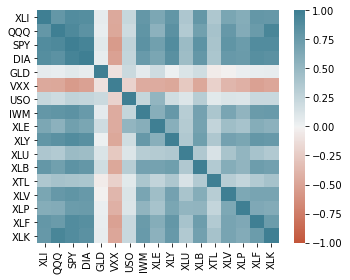

In [40]:
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

## Scatterplots(산점도)
> 두변수 사이의 관계를 시각화하는 가장 기본적인 방법  
  x축,y축은 각각의 변수들을 의미하고 그래프의 각 점은 하나의 레코드를 의미한다.

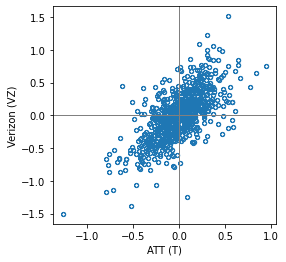

In [41]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

Line2D(_line1)


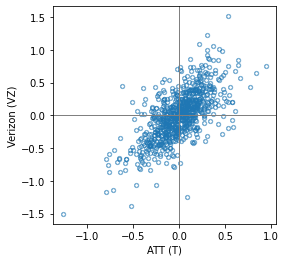

In [42]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))